In [2]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
import matplotlib.pyplot as plt

In [ ]:
sendEmail="heoysik2@gmail.com"
recvEmail="heoysik@mju.ac.kr"
password="tisq zrgq hqyb hmpk"

smtpName="smtp.gmail.com"
smtpPort=587

text="안녕하세요 테스트용 메일입니다"
msg=MIMEText(text)
msg['Subject']="테스트 메일 제목"
msg['From']=sendEmail
msg['To']=recvEmail
s=smtplib.SMTP(smtpName, smtpPort)
s.starttls()
s.login(sendEmail, password)
s.sendmail(sendEmail, recvEmail, msg.as_string())
s.close()

In [6]:
sendEmail="heoysik2@gmail.com"
recvEmail="heoysik@mju.ac.kr"
password="tisq zrgq hqyb hmpk"

smtpName="smtp.gmail.com"
smtpPort=587

msg=MIMEMultipart()
text="안녕하세요 테스트용 메일입니다"
contentPart=MIMEText(text)
msg.attach(contentPart)
msg['Subject']="테스트 메일 제목"
msg['From']=sendEmail
msg['To']=recvEmail

etcFileName="/Users/parkhyunsik/파이썬/---/메일자동화_API.ipynb"
with open(etcFileName, 'rb') as f:
    etcPart=MIMEApplication(f.read())
    etcPart.add_header('Content-Disposition', 'attachment', filename='메일자동화_API.ipynb')
    msg.attach(etcPart)

s=smtplib.SMTP(smtpName, smtpPort)
s.starttls()
s.login(sendEmail, password)
s.sendmail(sendEmail, recvEmail, msg.as_string())
s.close()

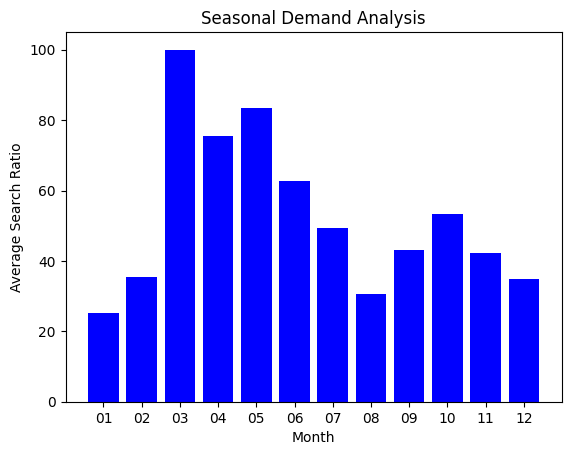

In [10]:
import os
import sys
import urllib.request
import json
client_id = "rDGy3C9yVbvQc7aLakBT"
client_secret = "8aUotgovSu"
url = "https://openapi.naver.com/v1/datalab/search"
body = "{\"startDate\":\"2024-01-01\",\"endDate\":\"2025-01-01\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    #print(response_body.decode('utf-8'))
    data=json.loads(response_body)
    items=data['results'][0]['data']
   
else:
    print("Error Code:" + rescode)

seasonal_map={}
for item in items:
    month=item['period'].split('-')[1]
    ratio=item['ratio']

    if month not in seasonal_map:
        seasonal_map[month]=[]
    seasonal_map[month].append(ratio)

# 월별 평균 계산
months = sorted(seasonal_map.keys())
averages = [sum(seasonal_map[m]) / len(seasonal_map[m]) for m in months]

# 그래프 그리기
plt.bar(months, averages, color='blue')
plt.title("Seasonal Demand Analysis")
plt.xlabel("Month")
plt.ylabel("Average Search Ratio")
plt.show()

